In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/IR_ASSIGNMENT2/Q3/IR-assignment-2-data (2) (1).txt",  header=None,sep=' ')
dataframe.drop(dataframe.columns[[138]], axis = 1, inplace = True)
dataframe = dataframe[dataframe[1] == 'qid:4']
sorted_dataframe = dataframe.sort_values(by=[0], ignore_index=True, ascending=False)

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
print(color.UNDERLINE+color.CYAN+color.BOLD+"Dataframe"+color.END)
dataframe

Dataframe


,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
print(color.UNDERLINE+color.CYAN+color.BOLD+"Sorted Dataframe"+color.END)
sorted_dataframe

Sorted Dataframe


,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:41,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0
99,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:38,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0
100,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,127:65,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0
101,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,127:65,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0


In [ ]:
# part 1 and 2 

In [ ]:
# here we are finding the maximum dcg.

maximum_DCG = 0
dcg = 0
R_dictionary = {}
count_of_files = 1

for i in range(sorted_dataframe.shape[0]):
  relevance = sorted_dataframe.iloc[i,0]
  if(i==0):
    maximum_DCG = sorted_dataframe.iloc[i,0]
  else:
    maximum_DCG = maximum_DCG + relevance/math.log(i+1, 2)

  if relevance in R_dictionary:
    R_dictionary[relevance] += 1
  else:
    R_dictionary[relevance] = 1

#here we are finding dcg.
for i in range(dataframe.shape[0]):
  relevance = dataframe.iloc[i,0]
  if(i==0):
    dcg = dataframe.iloc[i,0]
  else:
    dcg = dcg + relevance / math.log(i+1, 2)


print(color.PURPLE+color.BOLD+f'Maximum Discounted Cumulative Gain = {maximum_DCG} \n')
print(color.PURPLE+color.BOLD+f'Discounted Cumulative Gain = {dcg} \n')


for r in R_dictionary:
  count_of_files = count_of_files * math.factorial(R_dictionary[r])

print(color.PURPLE+color.BOLD+f'Count of possible files that could get MAXDCG are : {count_of_files}')


Maximum Discounted Cumulative Gain = 20.989750804831445 

Discounted Cumulative Gain = 12.550247459532576 

Count of possible files that could get MAXDCG are : 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [ ]:
# part 3

In [ ]:
# here we are computing dcg and total dcg.
total_dcg=dcg/maximum_DCG
print(color.BLUE+color.BOLD+f'Maximum Discounted Cumulative Gain (MDCG) for whole dataset is: {total_dcg} \n')
top_50=dataframe.iloc[:50]
sorted_50_dataframe = top_50.sort_values(by=[0], ascending=False, ignore_index=True)
maximum_dcg_fifty=0
dcg_fifty=0
for i in range(sorted_50_dataframe.shape[0]):
  relevance = sorted_50_dataframe.iloc[i,0]
  if(i==0):
    maximum_dcg_fifty = sorted_50_dataframe.iloc[i,0]
  else:
    maximum_dcg_fifty = maximum_dcg_fifty + relevance/math.log(i+1, 2)

#here we are finding dcg.

for i in range(top_50.shape[0]):
  relevance = top_50.iloc[i,0]
  if(i==0):
    dcg_fifty = top_50.iloc[i,0]
  else:
    dcg_fifty = dcg_fifty + relevance / math.log(i+1, 2)
ndcg_fifty=dcg_fifty/maximum_dcg_fifty
print(color.BLUE+color.BOLD+f'Discounted Cumulative Gain (DCG) for first 50 rows is: {ndcg_fifty} \n')

Maximum Discounted Cumulative Gain (MDCG) for whole dataset is: 0.5979226516897831 

Discounted Cumulative Gain (DCG) for first 50 rows is: 0.5253808413557646 



In [ ]:
#part 4

Text(0.5, 1.0, 'Precison-Recall Graph')

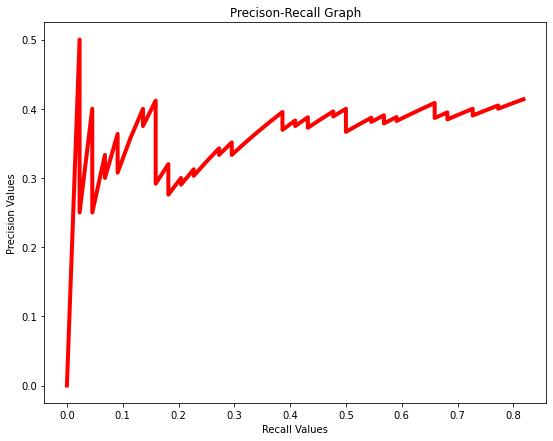

In [ ]:
#Here we are performing the operation on the 75th feature of the dataset and then we are ploting the precision and recall graph.
feature_75=dataframe.iloc[:,76]
arrayR=dataframe.iloc[:,0]
finalR=0
for i in range(len(arrayR)):
  if(arrayR[i]>=1):
    finalR=finalR+1
    arrayR[i]=1
dictR = dict(zip(feature_75, arrayR))
sorted_rel_dict=sorted(dictR.items(),reverse=True)
precision=[]
recall=[]
temporaryR=0
c=0
for m,n in sorted_rel_dict:
  c=c+1
  if(n==1):
    temporaryR=temporaryR+1
  p=temporaryR/c
  r=temporaryR/finalR
  precision.append(p)
  recall.append(r)
plt.figure(figsize=(9,7))

plt.plot(recall, precision,color='red',linewidth=4)

plt.xlabel('Recall Values')
plt.ylabel('Precision Values')
plt.title('Precison-Recall Graph')
